# Data Exploration of the Steam Dataset

Please download the dataset at the following link and assign the csv path below:

https://www.gigasheet.com/sample-data/steam-game-reviews

## 1 - Setup

### 1.1 Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Load Datasets

Steam Reviews dataset

In [2]:
reviews_path = '../data/Steam Game Reviews export 2025-09-03 01-50-49.csv' # Replace with the path to your reviews CSV File
game_metadata_path = '../data/games_description.csv' # Replace with path to game metadata CSV file


steamreviews = pd.read_csv(reviews_path)
gamemetadata = pd.read_csv(game_metadata_path)
steamreviews.head()


,review,hours_played,helpful,funny,recommendation,date,game_name,username
0,The game itself is also super fun. The PvP and...,39.9,1152,13,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Sentinowl\n224 products in account
1,Never cared much about Warhammer until this ga...,91.5,712,116,Recommended,13 September,"Warhammer 40,000: Space Marine 2",userpig\n248 products in account
2,A salute to all the fallen battle brothers who...,43.3,492,33,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Imparat0r\n112 products in account
3,this game feels like it was made in the mid 20...,16.8,661,15,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Fattest_falcon
4,Reminds me of something I've lost. A genuine g...,24.0,557,4,Recommended,12 September,"Warhammer 40,000: Space Marine 2",Jek\n410 products in account


In [3]:
gamemetadata.head()

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...
2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)","324,124",https://store.steampowered.com/app/1091500/Cyb...
4,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)","491,741",https://store.steampowered.com/app/1245620/ELD...


### 1.3 Merge Datasets

In [4]:
steamdataset = pd.merge(steamreviews, gamemetadata, left_on='game_name', right_on='name', how='left')
steamdataset.drop(columns=['name'], inplace=True)
steamdataset

,review,hours_played,helpful,funny,recommendation,date,game_name,username,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,The game itself is also super fun. The PvP and...,39.9,1152,13,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Sentinowl\n224 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
1,Never cared much about Warhammer until this ga...,91.5,712,116,Recommended,13 September,"Warhammer 40,000: Space Marine 2",userpig\n248 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
2,A salute to all the fallen battle brothers who...,43.3,492,33,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Imparat0r\n112 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,this game feels like it was made in the mid 20...,16.8,661,15,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Fattest_falcon,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
4,Reminds me of something I've lost. A genuine g...,24.0,557,4,Recommended,12 September,"Warhammer 40,000: Space Marine 2",Jek\n410 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992148,2022 Early Access Review Loads of fun!Initiall...,4.2,1,0,Recommended,"August 4, 2022",Turbo Golf Racing,"Fatal Exit\n1,902 products in account",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992149,2022 Early Access Review Great fun!,8.5,1,0,Recommended,"August 4, 2022",Turbo Golf Racing,cleybaR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992150,2022 Early Access Review Excellent pick up and...,83.3,2,0,Recommended,"August 4, 2022",Turbo Golf Racing,Sim\n600 products in account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992151,2022 Early Access Review This game is so much ...,3.8,1,0,Recommended,"August 4, 2022",Turbo Golf Racing,Fatboybadboy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.4 Clean up data

In [5]:
steamdataset[steamdataset['date'].isna()].game_name.value_counts()

Series([], Name: count, dtype: int64)

Why are these missing values?? There are 14 games with missing values, we can fill them in later.

In [6]:
steamdataset[steamdataset['short_description'].isna()]['game_name'].unique()

array(['Raft', 'Stray', 'Dead Cells', "Don't Starve Together",
       'Ori and the Will of the Wisps', 'Life is Strange - Episode 1',
       'Human Fall Flat', "It Takes Two Friend's Pass", "Don't Starve",
       'It Takes Two', 'NieR:Automata™', 'PAYDAY 3', 'GUNDAM BREAKER 4',
       'Caves of Qud', 'Turbo Golf Racing'], dtype=object)

In [7]:
steamdataset[steamdataset['release_date'].isna()]['game_name'].unique()

array(['Raft', 'Stray', 'Dead Cells', "Don't Starve Together",
       'Ori and the Will of the Wisps', 'Life is Strange - Episode 1',
       'Human Fall Flat', "It Takes Two Friend's Pass", "Don't Starve",
       'It Takes Two', 'NieR:Automata™', 'PAYDAY 3', 'GUNDAM BREAKER 4',
       'Caves of Qud', 'Turbo Golf Racing'], dtype=object)

In [8]:
steamdataset[steamdataset['link'].isna()]['game_name'].unique()

array(['Raft', 'Stray', 'Dead Cells', "Don't Starve Together",
       'Ori and the Will of the Wisps', 'Life is Strange - Episode 1',
       'Human Fall Flat', "It Takes Two Friend's Pass", "Don't Starve",
       'It Takes Two', 'NieR:Automata™', 'PAYDAY 3', 'GUNDAM BREAKER 4',
       'Caves of Qud', 'Turbo Golf Racing'], dtype=object)

In [9]:
# TODO FILL IN MISSING METADATA, CAN BE DONE MANUALLY AT https://steamdb.info/ SEARCH FOR EACH GAME AND FILL IN

## Data Exploration

Let's look at the data and what we can work with for now.

TODO - username is a little messed up or missing for some of them, a few NaN values game descriptions, perhaps they weren't included in the secondary dataset, 11 games can be filled in manually. Can check some stuff with these 

In [10]:
steamdataset.release_date = pd.to_datetime(steamdataset['release_date'], errors='coerce')

In [11]:
steamdataset.release_date

0        2024-09-09
1        2024-09-09
2        2024-09-09
3        2024-09-09
4        2024-09-09
            ...    
992148          NaT
992149          NaT
992150          NaT
992151          NaT
992152          NaT
Name: release_date, Length: 992153, dtype: datetime64[ns]

In [13]:
steamdataset.groupby(steamdataset['release_date'].dt.year).game_name.nunique()

release_date
2006.0     2
2007.0     1
2009.0     2
2010.0     2
2011.0     3
2012.0     2
2013.0     9
2014.0     5
2015.0    12
2016.0    12
2017.0    13
2018.0    22
2019.0    14
2020.0    14
2021.0    19
2022.0    20
2023.0    32
2024.0    41
Name: game_name, dtype: int64

## B. Transformations

### Missing Data Fixing

In [14]:
# A few dates are missing the year, highly likely that the missing year is 2024. When collecting data, Steam shows recent reviews WITHOUT the year.
def fixDates(date): 
    try:
        parts = date.split(' ')
        if len(parts) == 3:  
            # Already in format like "September 12, 2020"
            return date
        elif len(parts) == 2:
            # Format "12 September" → reorder → "September 12, 2024"
            if parts[0].isnumeric():
                day, month = parts
            else:
                month, day = parts
            fixed = f"{month} {day}, 2024"
            return fixed
        else:
            return pd.NA
    except Exception:
        return pd.NA

#### Series.map + date fixing

In [15]:
# Removing empty reviews, no text in the review column means no review information to analyize
steamdataset = steamdataset.dropna(subset=['review']).copy() # Need to use copy to avoid SettingWithCopyWarning
steamdataset['date'] = steamdataset['date'].map(fixDates)
steamdataset['date'] = pd.to_datetime(steamdataset['date'], errors='coerce')
steamdataset

,review,hours_played,helpful,funny,recommendation,date,game_name,username,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,The game itself is also super fun. The PvP and...,39.9,1152,13,Recommended,2024-09-14,"Warhammer 40,000: Space Marine 2",Sentinowl\n224 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09,['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
1,Never cared much about Warhammer until this ga...,91.5,712,116,Recommended,2024-09-13,"Warhammer 40,000: Space Marine 2",userpig\n248 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09,['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
2,A salute to all the fallen battle brothers who...,43.3,492,33,Recommended,2024-09-14,"Warhammer 40,000: Space Marine 2",Imparat0r\n112 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09,['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,this game feels like it was made in the mid 20...,16.8,661,15,Recommended,2024-09-14,"Warhammer 40,000: Space Marine 2",Fattest_falcon,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09,['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
4,Reminds me of something I've lost. A genuine g...,24.0,557,4,Recommended,2024-09-12,"Warhammer 40,000: Space Marine 2",Jek\n410 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09,['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992148,2022 Early Access Review Loads of fun!Initiall...,4.2,1,0,Recommended,2022-08-04,Turbo Golf Racing,"Fatal Exit\n1,902 products in account",NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
992149,2022 Early Access Review Great fun!,8.5,1,0,Recommended,2022-08-04,Turbo Golf Racing,cleybaR,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
992150,2022 Early Access Review Excellent pick up and...,83.3,2,0,Recommended,2022-08-04,Turbo Golf Racing,Sim\n600 products in account,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
992151,2022 Early Access Review This game is so much ...,3.8,1,0,Recommended,2022-08-04,Turbo Golf Racing,Fatboybadboy,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
steamdataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991650 entries, 0 to 992152
Data columns (total 20 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   review                                   991650 non-null  object        
 1   hours_played                             991650 non-null  float64       
 2   helpful                                  991650 non-null  int64         
 3   funny                                    991650 non-null  int64         
 4   recommendation                           991650 non-null  object        
 5   date                                     989875 non-null  datetime64[ns]
 6   game_name                                991650 non-null  object        
 7   username                                 991569 non-null  object        
 8   short_description                        924758 non-null  object        
 9   long_description               

### Vectorized Boolean Mask

In [17]:
# TODO We can possibly use the hours played or funny or helpful votes to create categorial columns, like oh this has more than some number of hours played, this is a player who played a lot of this game, or this is a funny review, etc.

steamdataset['popular'] = steamdataset['helpful'] > 50
steamdataset['popular'].value_counts()

popular
False    928676
True      62974
Name: count, dtype: int64

In [111]:
# We want to adjust recommended to binary so that it is easier to work with
# 1 will be recommended, 0 is not recommended
steamdataset['recommendation'] = steamdataset['recommendation'].map({"Recommended": 1, "Not Recommended": 0})
steamdataset['recommendation'].value_counts()

recommendation
1    805315
0    186335
Name: count, dtype: int64

Because we updated the values of recommendation to binary, we can use mean to get a rec_ratio for each individual game

In [115]:
rec_ratios = steamdataset.groupby('game_name')['recommendation'].mean()

In [ ]:
# Now we can apply rec_ratio to every game with the map function.
# Rec ratios are already in key value pair {game_name: rec_ratio} so it is easily applicable.
steamdataset['rec_ratio'] = steamdataset['game_name'].map(rec_ratios)
steamdataset

,review,hours_played,helpful,funny,recommendation,date,game_name,username,short_description,long_description,...,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link,popular,rec_ratio
0,The game itself is also super fun. The PvP and...,39.9,1152,13,1,2024-09-14,"Warhammer 40,000: Space Marine 2",Sentinowl\n224 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,...,['Requires a 64-bit processor and operating sy...,2024-09-09,['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...,True,0.834706
1,Never cared much about Warhammer until this ga...,91.5,712,116,1,2024-09-13,"Warhammer 40,000: Space Marine 2",userpig\n248 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,...,['Requires a 64-bit processor and operating sy...,2024-09-09,['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...,True,0.834706
2,A salute to all the fallen battle brothers who...,43.3,492,33,1,2024-09-14,"Warhammer 40,000: Space Marine 2",Imparat0r\n112 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,...,['Requires a 64-bit processor and operating sy...,2024-09-09,['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...,True,0.834706
3,this game feels like it was made in the mid 20...,16.8,661,15,1,2024-09-14,"Warhammer 40,000: Space Marine 2",Fattest_falcon,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,...,['Requires a 64-bit processor and operating sy...,2024-09-09,['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...,True,0.834706
4,Reminds me of something I've lost. A genuine g...,24.0,557,4,1,2024-09-12,"Warhammer 40,000: Space Marine 2",Jek\n410 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,...,['Requires a 64-bit processor and operating sy...,2024-09-09,['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...,True,0.834706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992148,2022 Early Access Review Loads of fun!Initiall...,4.2,1,0,1,2022-08-04,Turbo Golf Racing,"Fatal Exit\n1,902 products in account",NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,False,0.868545
992149,2022 Early Access Review Great fun!,8.5,1,0,1,2022-08-04,Turbo Golf Racing,cleybaR,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,False,0.868545
992150,2022 Early Access Review Excellent pick up and...,83.3,2,0,1,2022-08-04,Turbo Golf Racing,Sim\n600 products in account,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,False,0.868545
992151,2022 Early Access Review This game is so much ...,3.8,1,0,1,2022-08-04,Turbo Golf Racing,Fatboybadboy,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,False,0.868545


In [ ]:
# TODO can use map or apply to fix usernames with some function fixUsernames. 

## C. Grouping And Sorting

Question: What are traits about popular reviews differ from regular (<=50 helpful) reviews? What are traits of popular/helpful reviews?

In [117]:
# TODO A few group by options. By release or review year, game name, recommended, any new categorical columns made, overall rating... 
# Check word counts on popular reviews
print(steamdataset.groupby('popular').review.apply(lambda x: x.str.split(" ").str.len().mean()))
print("Average word count between popular and not popular reviews show that popular reviews are longer on average. By over double. To be expected since more helpful reviews are likely more detailed.")
print(steamdataset.groupby('popular').recommendation.value_counts(normalize=True))
print("This is the calculation of recommendation ratios for 'popular' reviews (>50 helpful votes). \nPopular reviews also have a higher ratio of being more critical than non-popular reviews (18% vs 23%). Not a significant margin, but users find critical reviews more helpful.")

popular
False     63.759329
True     142.317004
Name: review, dtype: float64
Average word count between popular and not popular reviews show that popular reviews are longer on average. By over double. To be expected since more helpful reviews are likely more detailed.
popular  recommendation
False    1                 0.815008
         0                 0.184992
True     1                 0.769159
         0                 0.230841
Name: proportion, dtype: float64
This is the calculation of recommendation ratios for 'popular' reviews (>50 helpful votes). 
Popular reviews also have a higher ratio of being more critical than non-popular reviews (18% vs 23%). Not a significant margin, but users find critical reviews more helpful.


Question: Does playtime correlate with recommendations? If a player plays longer, do they like the game more?

In [118]:
print(steamdataset.groupby('recommendation').hours_played.mean())
print("What do recommendations mean for hours played? \nAnswer: Recommended reviews seem to play slightly more hours (10%) on average than non=recommended reviews. However, the difference is not as significant as expected.")

recommendation
0    316.266324
1    344.539102
Name: hours_played, dtype: float64
What do recommendations mean for hours played? 
Answer: Recommended reviews seem to play slightly more hours (10%) on average than non=recommended reviews. However, the difference is not as significant as expected.


Question: Which publishers and developers have the most recommendations? This could be an indicator of popularity so we can also find recommendation ratios as well!

In [130]:
publisherrecs = pd.DataFrame(steamdataset[steamdataset['recommendation'] == 1].groupby('publisher')['recommendation'].count().sort_values(ascending=False).head(10))
developerrecs = pd.DataFrame(steamdataset[steamdataset['recommendation'] == 1].groupby('developer')['recommendation'].count().sort_values(ascending=False).head(10))
print(publisherrecs, "\n", developerrecs, "\n")
print("Top 10 publishers and developers by number of recommendations. \nThese are mostly large publishers and developers, so this is expected.")

                             recommendation
publisher                                  
['Electronic Arts']                   32534
['Xbox Game Studios']                 29009
['SEGA']                              26400
['Valve']                             20415
['Paradox Interactive']               16470
['Ubisoft']                           14450
['Coffee Stain Publishing']           14323
['Square Enix']                       14086
['CAPCOM Co., Ltd.']                  12805
['Bethesda Softworks']                 9922 
                                                     recommendation
developer                                                         
['Valve']                                                    15630
['CAPCOM Co., Ltd.']                                         12805
['FromSoftware, Inc.']                                       12703
['SCS Software']                                              9785
['Square Enix']                                               9195
[

Let's Look at developer and publisher ratios! This should give more indication of what users like, whereas above gives indication of who users would purchase from.

In [133]:
publisherrecsratio = pd.DataFrame(steamdataset.groupby('publisher').recommendation.mean().sort_values(ascending=False).head(10))
developerrecsratio = pd.DataFrame(steamdataset.groupby('developer').recommendation.mean().sort_values(ascending=False).head(10))
print(publisherrecsratio, "\n", developerrecsratio, "\n")
print("Top 10 publishers and developers by recommendation ratio. \nThese are a mix of large and smaller publishers and developers, indicating that users may prefer games from these companies more. \nSomething to note, these organizations share publisher and developer roles. Indicating that these are independent studios (with no large publisher backing). \nThese games may fit a niche that they do very well!")

                                           recommendation
publisher                                                
['BeamNG']                                       0.998397
['Landfall']                                     0.995382
['Duoyi Games']                                  0.994209
['PopCap Games, Inc.', 'Electronic Arts']        0.994012
['poncle']                                       0.991218
['Studio Minus']                                 0.990214
['Supergiant Games']                             0.989000
['Amistech Games']                               0.987976
['Unknown Worlds Entertainment']                 0.987349
['Mega Crit']                                    0.986824 
                                   recommendation
developer                                       
['BeamNG']                              0.998397
['Landfall']                            0.995382
['Duoyi Games']                         0.994209
['PopCap Games, Inc.']                  0.994012
['poncle

Now let's look at the opposite. What do players not enjoy as much in terms of ratios. What polarizes them?

In [134]:
publisherbadrecsratio = pd.DataFrame(steamdataset.groupby('publisher').recommendation.mean().sort_values(ascending=True).head(10))
developerbadrecsratio = pd.DataFrame(steamdataset.groupby('developer').recommendation.mean().sort_values(ascending=True).head(10))
print(publisherbadrecsratio, "\n", developerbadrecsratio, "\n")
print("Top 10 publishers and developers by LOWEST recommendation ratio.")

                                        recommendation
publisher                                             
['Gaijin Network Ltd']                        0.345578
['SEGA', 'Feral Interactive']                 0.422284
['Activision']                                0.434541
['KONAMI']                                    0.458987
['NEXON']                                     0.460248
['Studio Wildcard', 'Snail Games USA']        0.464221
['Wizards of the Coast LLC']                  0.476714
['Bungie']                                    0.507987
['Blizzard Entertainment, Inc.']              0.516980
['Wargaming Group Limited']                   0.546063 
                                                     recommendation
developer                                                         
['Sledgehammer Games', 'Treyarch', 'Infinity Wa...        0.224551
['EA Canada & EA Romania']                                0.302215
['Colossal Order Ltd.']                                   0.332934
['S

Question: What about any game in general?

In [139]:
print(steamdataset.groupby('game_name').rec_ratio.mean().sort_values(ascending=False).head(10))
print(steamdataset.groupby('game_name').rec_ratio.mean().sort_values(ascending=True).head(10))
"Top 10 games by HIGHEST and LOWEST recommendation ratio."

game_name
BeamNG.drive                         0.998397
Totally Accurate Battle Simulator    0.995382
Gunfire Reborn                       0.994209
Plants vs. Zombies GOTY Edition      0.994012
Mount & Blade: Warband               0.993013
Vampire Survivors                    0.991218
People Playground                    0.990214
Hades                                0.989000
My Summer Car                        0.987976
Portal 2                             0.987800
Name: rec_ratio, dtype: float64
game_name
Call of Duty®               0.224551
PAYDAY 3                    0.225380
EA SPORTS FC™ 24            0.265359
eFootball™                  0.310778
Cities: Skylines II         0.332934
ARK: Survival Ascended      0.344737
War Thunder                 0.345578
Total War: WARHAMMER III    0.422284
NBA 2K24                    0.424487
Need for Speed™ Unbound     0.426318
Name: rec_ratio, dtype: float64


'Top 10 games by HIGHEST and LOWEST recommendation ratio.'

## D. Visuals

<Axes: title={'center': 'Number of Steam Reviews Over Time'}, xlabel='Year', ylabel='Number of Reviews'>

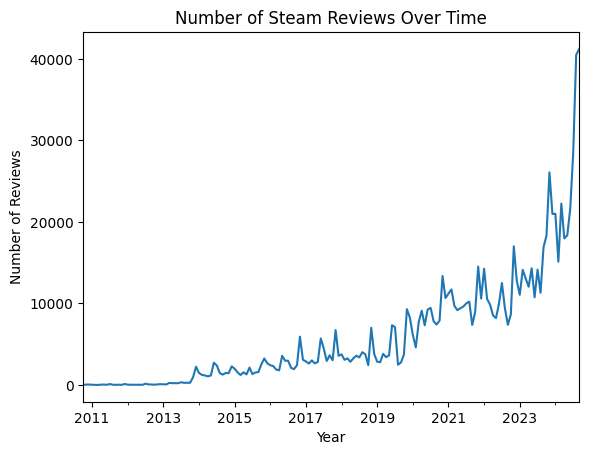

In [12]:
monthly_counts = steamdataset.groupby(steamdataset['date'].dt.to_period('M')).size()
monthly_counts.index = monthly_counts.index.to_timestamp()
monthly_counts.plot(kind='line', title='Number of Steam Reviews Over Time', xlabel='Year', ylabel='Number of Reviews')

Having played more hours of each game does not indicate that the review is more helpful. A certain amount of hours on the lower end may be enough to provide significant enough information for a good review!

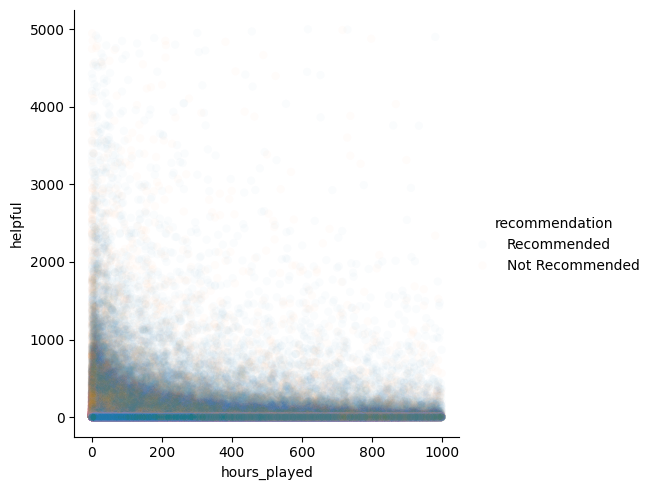

In [19]:
sns.relplot(data=steamdataset[(steamdataset['hours_played'] <= 1000) & (steamdataset['helpful'] <= 5000)], x='hours_played', y='helpful', hue='recommendation', alpha=0.02)

This graph shows that there is not a very significant correlation between funny and helpful reviews. So even if a review may be popular, it doesn't mean that it will equally gain helpful or funny votes. It is more likely that they will be either a helpful review or a funny review.

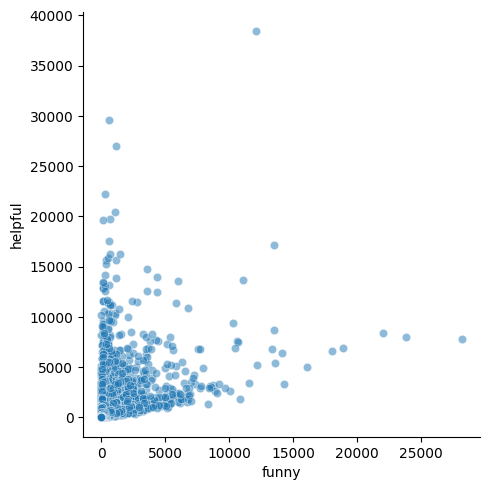

In [35]:
sns.relplot(data=steamdataset[steamdataset.funny <= 40000], x='funny', y='helpful', alpha=0.5)

In [ ]:
# TODO Properly organize the notebook with markdowns like explained in the slides, like A. Data Card, B. Transformations, 

In [ ]:
# TODO Need to create a script for downloading data maybe? Instructions are included but perhaps a script would be more convenient.